# Lab 03: Logistic Regression

##### Name: Pranisaa Charnparttaravanit 
##### ID: st121720

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Class Work

In [57]:
# Load student admissions data. The data file does not contain headers,
# so we use hard coded indices for exam 1, exam2, and the admission decision.

data = np.loadtxt('ex2data1.txt',delimiter = ',')
exam1_data = data[:,0]
exam2_data = data[:,1]

#Normalization
exam1_data_mean = np.mean(exam1_data, axis = 0)
exam2_data_mean = np.mean(exam2_data, axis = 0)
exam1_data_std = np.std(exam1_data, axis = 0)
exam2_data_std = np.std(exam2_data, axis = 0)
exam1_data = (exam1_data-exam1_data_mean)/exam1_data_std
exam2_data = (exam2_data-exam2_data_mean)/exam2_data_std

X = np.array([exam1_data, exam2_data]).T

y = data[:,2]

# Output some sample data

print('Exam scores', X[0:5,:])
print('-----------------------------')
print('Admission decision', y[0:5])

Exam scores [[-1.60224763  0.63834112]
 [-1.82625564 -1.2075414 ]
 [-1.53903969  0.3612943 ]
 [-0.28210129  1.0863683 ]
 [ 0.69152826  0.49337794]]
-----------------------------
Admission decision [0. 0. 0. 1. 1.]


### Plot the data

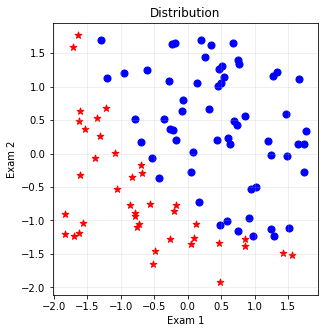

In [58]:
idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

fig1 = plt.figure(figsize=(5, 5)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Distribution')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(exam1_data[idx_0], exam2_data[idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(exam1_data[idx_1], exam2_data[idx_1], s=50, c='b', marker='o', label='Admitted')
plt.show()

### Partion data into training and test datasets

In [59]:
import random
m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];


### Initialize theta

In [60]:
theta_initial = np.full((n+1, 1),1)
theta_initial

array([[1],
       [1],
       [1]])

### Functions

In [61]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0] #normalizing grad for the grad vector
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0] #normalizing cost function
    grad = grad_j(X, y, y_pred)
    return cost[0], grad


### Testing thetas

In [62]:
print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])
print('Targets:', y[0:5,:])


Initial theta: [[1]
 [1]
 [1]]
Initial predictions: [[0.50902239]
 [0.11569987]
 [0.45568027]
 [0.85866756]
 [0.89888587]]
Targets: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Batch training for num_iters iterations

In [63]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history


### Train for 10000 iterations with alpha of 0.5

Theta optimized: [[1.63457094]
 [4.25104924]
 [4.01446154]]
Cost with optimized theta: 0.20311614790723748


Text(0.5, 1.0, 'Training cost over time with batch gradient descent (no normalization)')

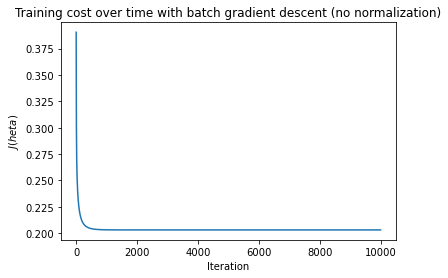

In [64]:
alpha = .5
num_iters = 10000
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")

### In-lab exercise questions

That took a long time, right?

See if you can do better. Try increasing the learning rate $\alpha$ and starting with a better initial $\theta$. How much does it help?

Better yet, try *normalizing the data* and see if the training converges better. How did it go? Discuss the effects of normalization, learning rate, and
initial $\theta$ in your report.




### In-lab exercise answer

By normalizing the data, increasing the learning rate and a better initial theta, the time taken to find the cost function with the optimal data dramatically decreases.

Moreover, normalizing the data also does not require as many iterations and require a smaller value of alpha when training the cost function to find the optimal thetas.

### Decision boundary

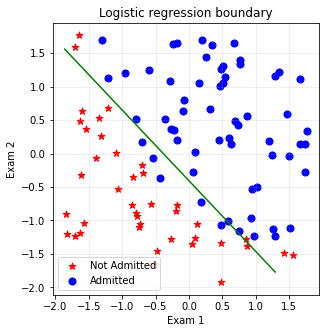

In [65]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X, theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()


### Test set performance

In [66]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_test_pred_soft = h(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int) #true how many percent

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))


Got test set soft R^2 0.6364, hard R^2 0.3730, accuracy 0.88


For classification, accuracy is probably the more useful measure of goodness of fit.

## Example 2: Loan prediction dataset

Let's take another example dataset and see what we can do with it.

This dataset is from [Kaggle](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset).

The data concern loan applications. It has 12 independent variables, including 5 categorical variables. The dependent variable is the decision "Yes" or "No" for extending a loan to an individual who applied.

One thing we will have to do is to clean the data, by filling in missing values and converting categorical data to reals.
We will use the Python libraries pandas and sklearn to help with the data cleaning and preparation.

### Read the data and take a look

In [67]:
# Import Pandas. You may need to run "pip3 install pandas" at the console if it's not already installed

import pandas as pd
import numpy as np
# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)


Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

### Check for missing values in the training and test data

In [68]:
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())


Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### Handle missing values

#### 1. Married

In [69]:
print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()

print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values)) #ratio of married to all statuses

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())


Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


#### 2. Dependents

In [70]:
#Dependents
# Here we see that categorical values are all numeric except one value "3+" 
# Create a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)

data_train.isnull().sum()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 3. Gender

In [71]:
print(data_train['Gender'].value_counts())
gender = data_train['Gender'].value_counts()

print('Gender ratio Male ', gender['Male'] / sum(gender.values))
print('Gender ratio Female ', gender['Female'] / sum(gender.values))

def fill_gender_status(num_male_train, num_female_train, num_male_test, num_female_test):        
    data_train['Gender'].fillna('Male', inplace=True, limit = num_male_train)
    data_train['Gender'].fillna('Female', inplace=True, limit = num_female_train)
    data_test['Gender'].fillna('Male', inplace=True, limit = num_male_test)
    data_test['Gender'].fillna('Female', inplace=True, limit = num_female_test)

fill_gender_status(10,3,9,2 )

print(data_train['Gender'].value_counts())

data_train.isnull().sum()

Male      489
Female    112
Name: Gender, dtype: int64
Gender ratio Male  0.8136439267886856
Gender ratio Female  0.18635607321131448
Male      499
Female    115
Name: Gender, dtype: int64


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 4. Self Employed

In [72]:
#Self_Employed
print(data_train['Self_Employed'].value_counts())
self_empl = data_train['Self_Employed'].value_counts()

print('Self_Employed ratio', self_empl['Yes'] / sum(self_empl.values))
print('Non-Self_Employed ratio',self_empl['No'] / sum(self_empl.values))

def fill_self_empl_status(num_yes_train, num_no_train, num_yes_test, num_no_test):        
    data_train['Self_Employed'].fillna('Yes', inplace=True, limit = num_yes_train)
    data_train['Self_Employed'].fillna('No', inplace=True, limit = num_no_train)
    data_test['Self_Employed'].fillna('Yes', inplace=True, limit = num_yes_test)
    data_test['Self_Employed'].fillna('No', inplace=True, limit = num_no_test)

fill_self_empl_status(5,27,3,20)

print(data_train['Self_Employed'].value_counts())

data_train.isnull().sum()

No     500
Yes     82
Name: Self_Employed, dtype: int64
Self_Employed ratio 0.140893470790378
Non-Self_Employed ratio 0.8591065292096219
No     527
Yes     87
Name: Self_Employed, dtype: int64


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 5. Credit History

In [73]:
#Credit_History
print(data_train['Credit_History'].value_counts())
cred_hist = data_train['Credit_History'].value_counts()

print('credit history ratio', cred_hist[1] / sum(cred_hist.values))
print('no credit history ratio',cred_hist[0] / sum(cred_hist.values))

def fill_cred_hist_status(num_yes_train, num_no_train, num_yes_test, num_no_test):        
    data_train['Credit_History'].fillna('1', inplace=True, limit = num_yes_train)
    data_train['Credit_History'].fillna('0', inplace=True, limit = num_no_train)
    data_test['Credit_History'].fillna('1', inplace=True, limit = num_yes_test)
    data_test['Credit_History'].fillna('0', inplace=True, limit = num_no_test)

fill_cred_hist_status(42,8,25,24)

print(data_train['Credit_History'].value_counts())

data_train.isnull().sum()
# data_test.isnull().sum()

1.0    475
0.0     89
Name: Credit_History, dtype: int64
credit history ratio 0.8421985815602837
no credit history ratio 0.15780141843971632
1.0    475
0.0     89
1       42
0        8
Name: Credit_History, dtype: int64


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Once missing values are filled in, you'll want to convert strings to numbers.

Finally, here's an example of replacing missing values for a numeric attribute. Typically, we would use the mean of the attribute over the training set. 

#### 6. Loan amount

In [74]:
#LoanAmount
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)
data_train.isnull().sum()
# data_test.isnull().sum()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### 7. Loan amount term

In [75]:
#Loan_Amount_Term
print(data_train['Loan_Amount_Term'].value_counts())

LoanAmt = data_train['Loan_Amount_Term'].value_counts()

print('mean loan amount term', np.mean(data_train["Loan_Amount_Term"]))

loan_amount_term_mean = np.mean(data_train["Loan_Amount_Term"])

data_train['Loan_Amount_Term'].fillna(loan_amount_term_mean, inplace=True, limit = 14)
data_test['Loan_Amount_Term'].fillna(loan_amount_term_mean, inplace=True, limit = 6)
# data_train.isnull().sum()
# data_test.isnull().sum()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
mean loan amount term 342.0


### Double-check for missing data

In [76]:
print(data_train.isnull().sum())
print(data_test.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


### String to number conversion

In [77]:
def convert_vals(col,col_name,answer1, answer2 ,answer3):
    ixd_1 = np.where(data_train[col_name] == answer1)
    ixd_0 = np.where(data_train[col_name]== answer2)
    ixd_2 = np.where(data_train[col_name]== answer3)
    for i in ixd_1:
        data_train.iloc[i,col] = 1
    for i in ixd_0:
        data_train.iloc[i,col] = 0
    for i in ixd_2:
        data_train.iloc[i,col] = 2

convert_vals(1,'Gender','Male','Female','')
convert_vals(2,'Married','Yes','No','')
convert_vals(4,'Education','Graduate','Not Graduate','')
convert_vals(5,'Self_Employed','No','Yes','')
convert_vals(11,'Property_Area','Semiurban','Rural','Urban')
convert_vals(12,'Loan_Status','Y','N','')

cols = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

X = data_train[cols]
X = X.astype(float)
X = np.array(X)
# print(X)

Y = data_train['Loan_Status']
Y = Y.astype(float)
Y = np.array(Y)

### Normalization

In [78]:
X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)

X_norm = (X - X_mean)/X_std
X_norm

array([[ 0.48006346, -1.36717185, -0.6944511 , ...,  0.27985054,
         0.43315227,  1.22329839],
       [ 0.48006346,  0.73143694,  0.12239368, ...,  0.27985054,
         0.43315227, -1.31851281],
       [ 0.48006346,  0.73143694, -0.6944511 , ...,  0.27985054,
         0.43315227,  1.22329839],
       ...,
       [ 0.48006346,  0.73143694,  0.12239368, ...,  0.27985054,
         0.43315227,  1.22329839],
       [ 0.48006346,  0.73143694,  0.93923845, ...,  0.27985054,
         0.43315227,  1.22329839],
       [-2.08305795, -1.36717185, -0.6944511 , ...,  0.27985054,
        -2.30865695, -0.04760721]])

### Addition of dummy

In [79]:
m, n = X.shape
print(X.shape)
XX = np.insert(X_norm, 0, 1, axis=1)
# print(XX.shape)
# print(Y.shape)
Y = Y.reshape(m, 1)

(614, 11)


### Initializing theta

In [80]:
theta_initial = np.full((n+1, 1),0) #dont not have to be 0s, != 0 can be roughly estimated from the plot 
theta_initial

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [81]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0] #normalizing grad for the grad vector
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0] #normalizing cost function
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

In [82]:
print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])
print('Targets:', Y[0:5,:])

Initial theta: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Initial predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets: [[1.]
 [0.]
 [1.]
 [1.]
 [1.]]


### Batch training for num_iters iterations

In [83]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

##### Train for 10000 iterations with the alpha of 0.005

Theta optimized: [[ 0.8452364 ]
 [-0.07528221]
 [ 0.28677032]
 [ 0.01270666]
 [ 0.16006867]
 [ 0.05819   ]
 [ 0.05314105]
 [-0.10269543]
 [-0.13365407]
 [-0.05102193]
 [ 1.2113657 ]
 [ 0.06251999]]
Cost with optimized theta: 0.4785802560797501


Text(0.5, 1.0, 'Training cost over time with batch gradient descent (no normalization)')

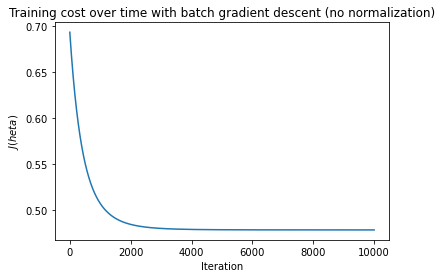

In [84]:
alpha = .005
num_iters = 10000
theta, j_history = train(XX, Y, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")

### Test set performance

NOTE: due to the missing "y" in the test set, it is not possible to validate the model using the test data set. Therefore, the validation was done on the train data set instead. 
With the given 'x' values in the train data set, y_pred was found using the thetas found during the training process. y_pred values were then compared to the y values initially given in the train data set. 

In [85]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_train_pred_soft = h(XX, theta)
y_train_pred_hard = (y_train_pred_soft > 0.5).astype(int)
# print(y_train_pred_hard)

test_rsq_soft = r_squared(Y, y_train_pred_soft)
test_rsq_hard = r_squared(Y, y_train_pred_hard)
test_acc = (y_train_pred_hard == Y.astype(int)).astype(int).sum() / Y.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))


Got test set soft R^2 0.2932, hard R^2 0.0982, accuracy 0.81


## Lab Report

In this assignment, after the data set was imported into puffer, we had to check whether there were any data missing,
These missing data could be classified into two types. One of which can be filled with the mean values, and the other can be filled according to the ratio.
After these missing data were well-handled, they were all converted to numbers with the data type of float. They were then normalized and dummy was added.

Now the data was ready. In this assignment thetas were assumed to be zeros as the input to our model.
After training the data with 10000 iterations and the alpha of 0.005, the optimized thetas and the cost were found.
To validate the results and the test performance, r-squared values were calculated. Soft r-squared came out to be 0.2932, hard r-squared as 0.0982 with the acccuracy pf 0.81.